In [3]:
#@title First Code with Tensorflow, converting Celsius to Fahrenheit

import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
#@title Setting up your training data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [8]:
#@title Let's create our model using the simplest possible model, the Dense Network that contains one neuron

# units = 1 specifies the number of neurons in the layer
# input_shape = 1 specifies that the input variable is a shape with  one-dimensional array
#layer0 is us building our first layer

layer0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#@title Assembling layers to a model
# here we are making use of the sequential model
#note you can just directly substitute your layer0 in the model without writing it out separately

model = tf.keras.Sequential([layer0])

In [10]:
#@title Compile the model with loss and optimizer function
#before you train your model, you need to compile your model

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [11]:
#@title Train the model
model_train = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


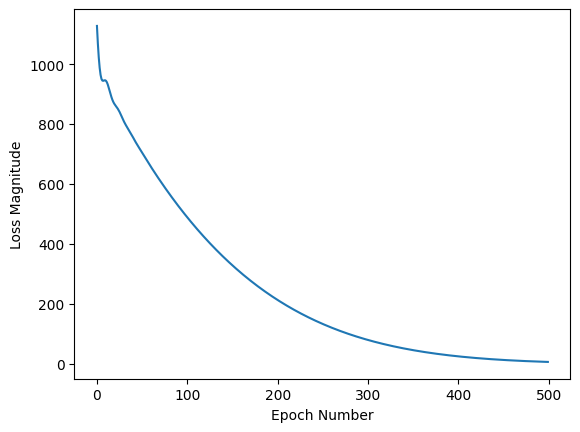

In [12]:
#@title Display training statistics
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(model_train.history['loss'])

In [15]:
#@title Predict values
input_data = np.array([[100.0]])  # Make sure to reshape the input correctly
predictions = model.predict(input_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[211.33836]]


In [16]:
#@title Looking at the Layer weights
#note this almost matched the formula connecting celsius and fahrenheit i.e F = C *1.8 + 32
print("These are the layer variables: {}".format(layer0.get_weights()))

These are the layer variables: [array([[1.8201959]], dtype=float32), array([29.318766], dtype=float32)]
